# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | yanykurgan
Processing Record 3 of Set 1 | al ghayzah
Processing Record 4 of Set 1 | zeya
Processing Record 5 of Set 1 | la passe
Processing Record 6 of Set 1 | zangguy
City not found. Skipping...
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | revelstoke
Processing Record 11 of Set 1 | badger
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | gornopravdinsk
Processing Record 15 of Set 1 | ji'an
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | horta
Processing Record 22

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,247.88,81,15,1.76,RU,1710700083
1,yanykurgan,43.9150,67.2481,283.38,36,95,2.28,KZ,1710700084
2,al ghayzah,16.2079,52.1760,298.94,65,0,3.35,YE,1710700085
3,zeya,53.7500,127.2667,257.86,89,5,2.46,RU,1710700086
4,la passe,45.5549,-0.8967,290.28,90,100,2.68,FR,1710700087


In [6]:
import os

output_directory = "output_data"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,247.88,81,15,1.76,RU,1710700083
1,yanykurgan,43.9150,67.2481,283.38,36,95,2.28,KZ,1710700084
2,al ghayzah,16.2079,52.1760,298.94,65,0,3.35,YE,1710700085
3,zeya,53.7500,127.2667,257.86,89,5,2.46,RU,1710700086
4,la passe,45.5549,-0.8967,290.28,90,100,2.68,FR,1710700087


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

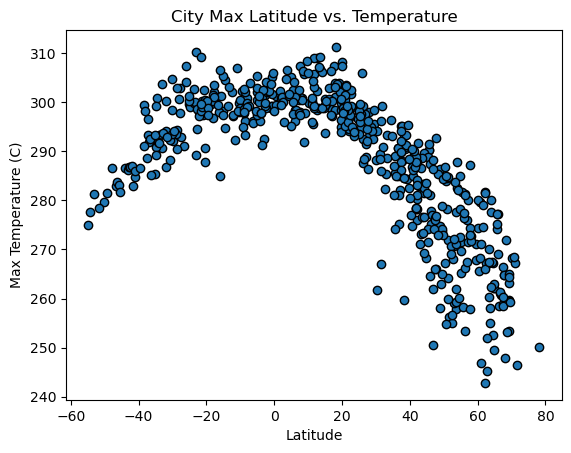

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

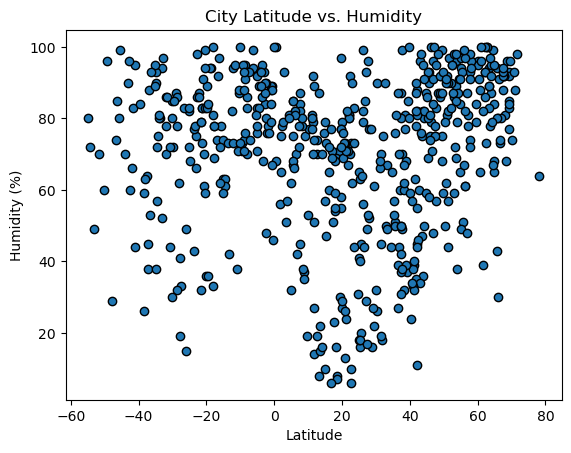

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

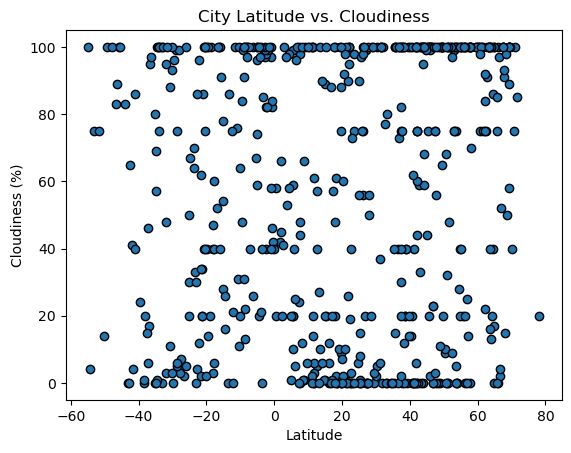

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

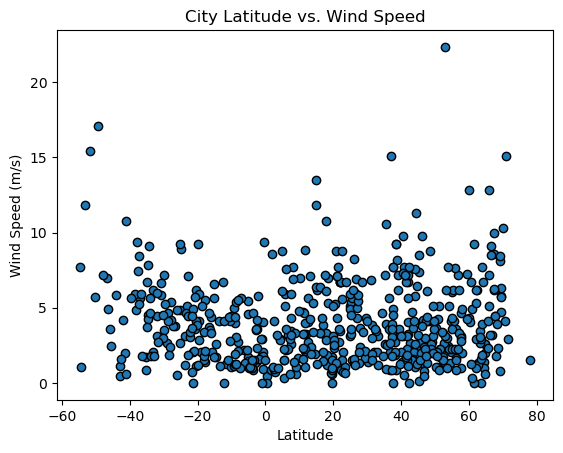

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, coordinates, show_equation=True):

    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
    # line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    plt.text(0.95, 0.6, line_equation, fontsize=12, color="red", ha='right', va='top', transform=plt.gca().transAxes)
    
    if show_equation:
        plt.annotate(line_equation, coordinates, fontsize=15, color="red")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    print(f"The r-squared value is {rvalue**2}")

    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,247.88,81,15,1.76,RU,1710700083
1,yanykurgan,43.9150,67.2481,283.38,36,95,2.28,KZ,1710700084
2,al ghayzah,16.2079,52.1760,298.94,65,0,3.35,YE,1710700085
3,zeya,53.7500,127.2667,257.86,89,5,2.46,RU,1710700086
4,la passe,45.5549,-0.8967,290.28,90,100,2.68,FR,1710700087


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,grytviken,-54.2811,-36.5092,277.61,72,4,1.06,GS,1710700090
14,adamstown,-25.0660,-130.1015,299.58,82,30,4.84,PN,1710700097
15,carnarvon,-24.8667,113.6333,299.03,68,67,8.94,AU,1710700098
16,waitangi,-43.9535,-176.5597,286.68,70,83,5.85,NZ,1710700100
17,west island,-12.1568,96.8225,297.14,94,21,0.00,CC,1710700101


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is 0.7451928393842685


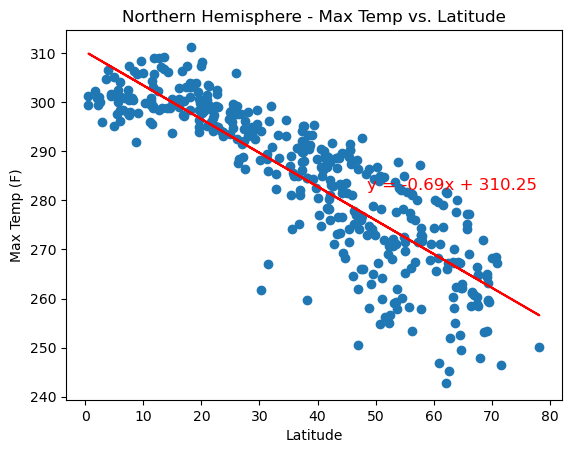

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp (F)", "Northern Hemisphere - Max Temp vs. Latitude", (10, 20), show_equation=True)

The r-squared value is 0.4824524324594294


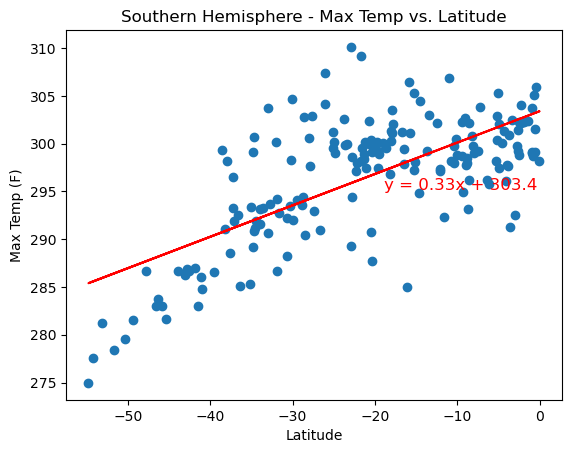

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp (F)", "Southern Hemisphere - Max Temp vs. Latitude", (10, 20), show_equation=True)

In [138]:
# Discussion about the linear relationship (Max Temp vs. Latitude):
# Northern Hemisphere: strong negative correlation
# Southern Hemisphere: weak positive correlation

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is 0.1350291051625436


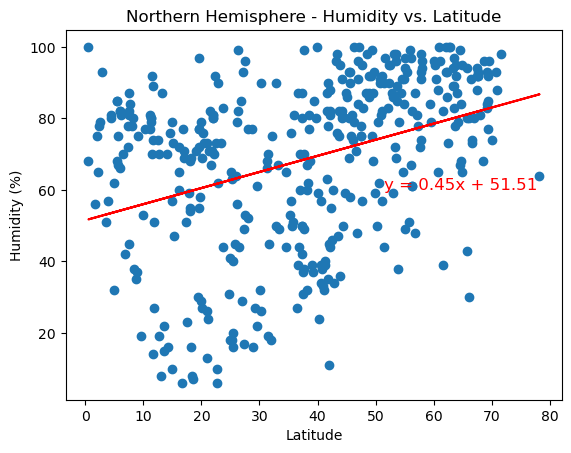

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)","Northern Hemisphere - Humidity vs. Latitude",(10, 20),show_equation=False)

The r-squared value is 0.05370596482965079


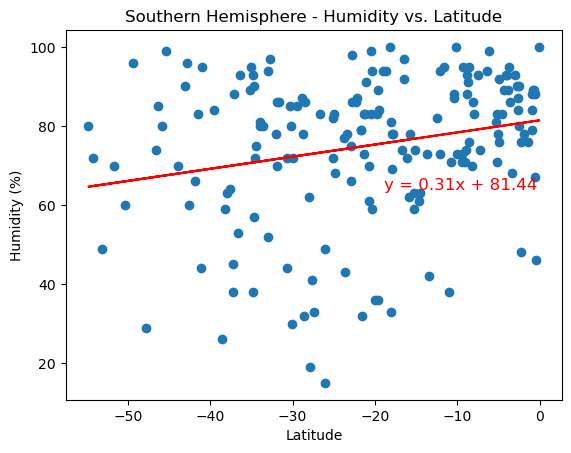

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)","Southern Hemisphere - Humidity vs. Latitude",(10, 20),show_equation=False)

** Discussion about the linear relationship: **

For both northern and southern hemisphere, the humidity has a moderate positive correlation with the latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is 0.026366723545847064


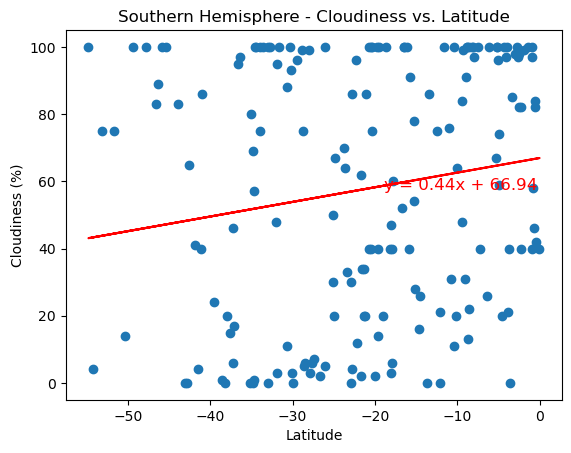

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude", (10,20), show_equation = False)

The r-squared value is 0.06468937986975491


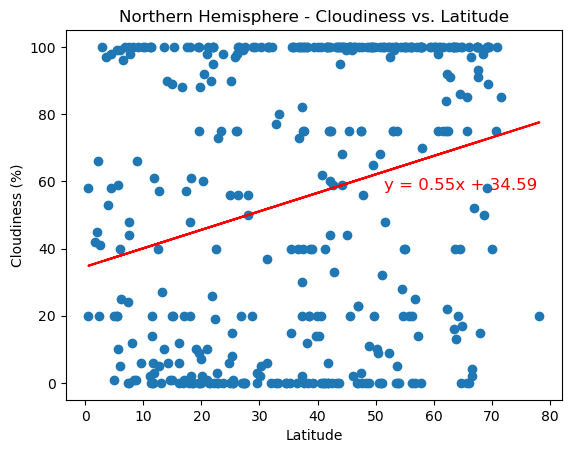

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude", (10,20), show_equation = False)

**Discussion about the linear relationship:**

For both northern and southern hemisphere, the cloudiness has a strong positive correlation with the latitude, especially in the southern atmosphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is 0.006054099366454964


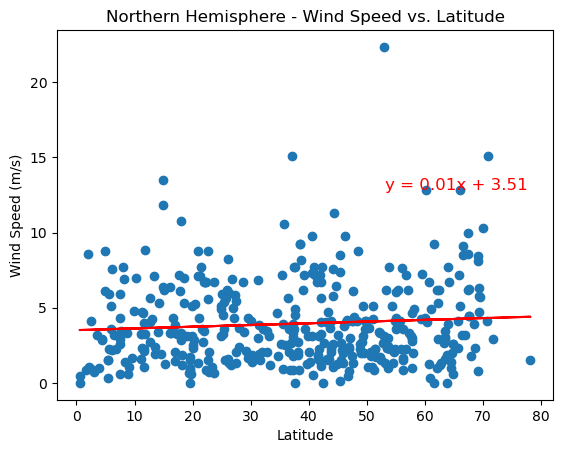

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern Hemisphere - Wind Speed vs. Latitude", (10,20), show_equation=False)

The r-squared value is 0.17722370921324163


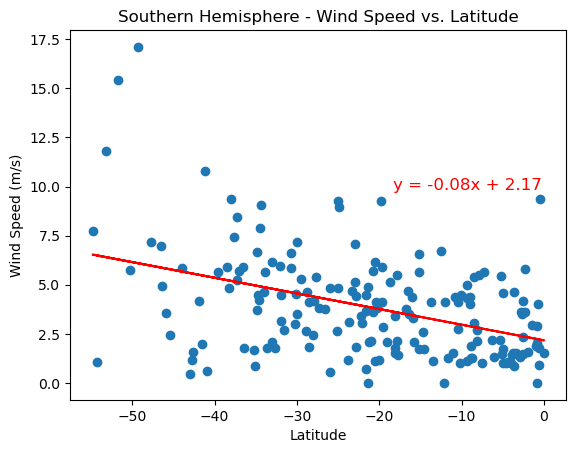

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern Hemisphere - Wind Speed vs. Latitude", (10,20), show_equation=False)

**Discussion about the linear relationship:**

For both northern and southern hemisphere, the wind speed has a very weak negative correlation with the latitude.